# Plotting for Exploratory data analysis

* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D


# Banknote authentication Data Set

Data set link - https://archive.ics.uci.edu/ml/datasets/banknote+authentication

* Aims to detect fraudulent notes accurately.
* A set of images taken from genuine and forged banknote-like specimens is created. Features such as wavelet variance,    wavelet skewness, wavelet kurtosis, and image entropy are extracted from the images.


In [224]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [225]:
# loading the data
bank_note_data = pd.read_csv("data_banknote_authentication.txt",  header=None)
bank_note_data.columns  = ['variance','skewness','curtosis', 'entropy', 'class']

In [226]:
# number of data points and number of features
print (bank_note_data.shape)

(1372, 5)


In [227]:
# changing the category names
bank_note_data['class'] = bank_note_data['class'].astype('category')
bank_note_data['class'] = bank_note_data['class'].cat.rename_categories({0:'non-counterfeit', 1: 'counterfeit' })
   

In [228]:
# displaying the top few rows of the data
bank_note_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,non-counterfeit
1,4.54590,8.1674,-2.4586,-1.46210,non-counterfeit
2,3.86600,-2.6383,1.9242,0.10645,non-counterfeit
3,3.45660,9.5228,-4.0112,-3.59440,non-counterfeit
4,0.32924,-4.4552,4.5718,-0.98880,non-counterfeit


In [229]:
# displaying the column names 
print (bank_note_data.columns)

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [230]:
bank_note_data['class'].value_counts()

non-counterfeit    762
counterfeit        610
Name: class, dtype: int64

# Univariate analysis - Single feature analysis

# Variance

Text(0.5, 1.0, 'Histogram of VARIANCE feature')

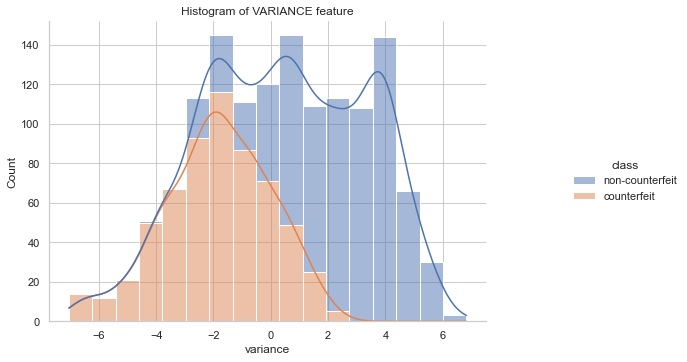

In [248]:
hist = sns.displot(data=bank_note_data, x="variance", hue="class", multiple="stack", kde=True)
hist.fig.set_size_inches(10,5)
plt.title("Histogram of VARIANCE feature")

In [249]:
bank_note_counterfeit = bank_note_data.loc[bank_note_data["class"] == "counterfeit"];
bank_note_non_counterfeit = bank_note_data.loc[bank_note_data["class"] == "non-counterfeit"];

[0.02786885 0.02459016 0.05245902 0.12459016 0.14754098 0.2295082
 0.16065574 0.12131148 0.08360656 0.02786885]
[-7.0421  -6.09872 -5.15534 -4.21196 -3.26858 -2.3252  -1.38182 -0.43844
  0.50494  1.44832  2.3917 ]
[0.00131234 0.02887139 0.05511811 0.0656168  0.15748031 0.16141732
 0.19160105 0.23097113 0.08923885 0.0183727 ]
[-4.2859  -3.17483 -2.06376 -0.95269  0.15838  1.26945  2.38052  3.49159
  4.60266  5.71373  6.8248 ]


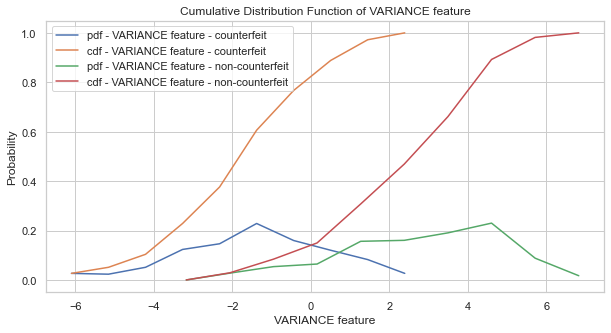

In [250]:
plt.figure(figsize=(10,5))

# counterfeit
counts, bin_edges = np.histogram(bank_note_counterfeit['variance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - VARIANCE feature - counterfeit")
plt.plot(bin_edges[1:], cdf, label = "cdf - VARIANCE feature - counterfeit")
plt.legend()

# non counterfeit
counts, bin_edges = np.histogram(bank_note_non_counterfeit['variance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - VARIANCE feature - non-counterfeit")
plt.plot(bin_edges[1:], cdf , label = "cdf - VARIANCE feature - non-counterfeit")
plt.title("Cumulative Distribution Function of VARIANCE feature")
plt.xlabel("VARIANCE feature")
plt.ylabel("Probability")
plt.legend()

In [251]:
# Statistics
print("statistics related to VARIANCE feature - counterfeit category")
print(bank_note_counterfeit["variance"].describe())

print("******************************************************************************************")
print("statistics related to VARIANCE feature - non-counterfeit category")
print(bank_note_non_counterfeit["variance"].describe())

statistics related to VARIANCE feature - counterfeit category
count    610.000000
mean      -1.868443
std        1.881183
min       -7.042100
25%       -3.061450
50%       -1.806100
75%       -0.541770
max        2.391700
Name: variance, dtype: float64
******************************************************************************************
statistics related to VARIANCE feature - non-counterfeit category
count    762.000000
mean       2.276686
std        2.019348
min       -4.285900
25%        0.883345
50%        2.553100
75%        3.884450
max        6.824800
Name: variance, dtype: float64


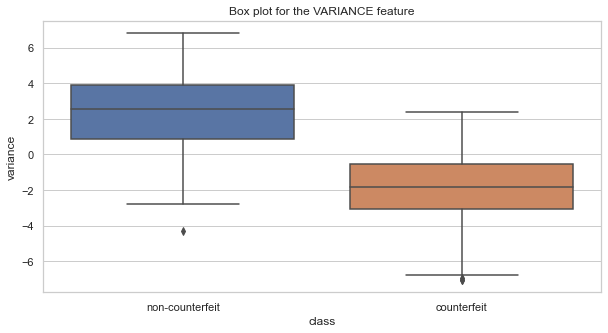

In [252]:
plt.figure(figsize=(10,5))
plt.title("Box plot for the VARIANCE feature")
sns.boxplot(x='class',y='variance', data=bank_note_data)
plt.show()

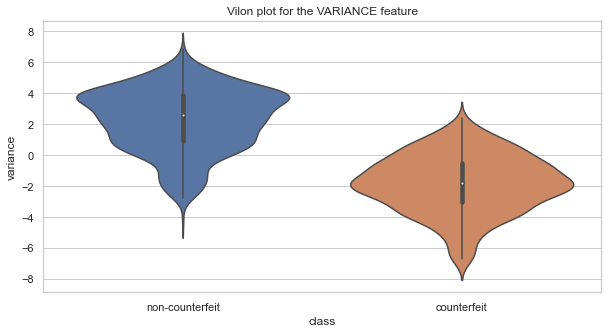

In [253]:
plt.figure(figsize=(10,5))
plt.title("Vilon plot for the VARIANCE feature")
sns.violinplot(x="class", y="variance", data = bank_note_data)
plt.show()

# Skewness

Text(0.5, 1.0, 'Histogram of SKEWNESS feature')

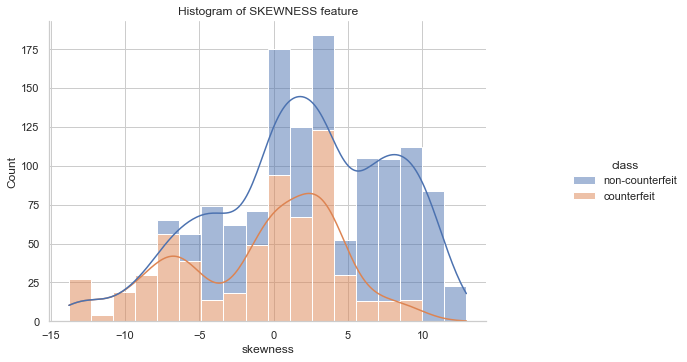

In [254]:
hist = sns.displot(data=bank_note_data, x="skewness", hue="class", multiple="stack", kde=True)
hist.fig.set_size_inches(10,5)
plt.title("Histogram of SKEWNESS feature")

[0.04918033 0.04098361 0.09672131 0.11311475 0.03278689 0.17868852
 0.17213115 0.24262295 0.03606557 0.03770492]
[-13.7731  -11.43565  -9.0982   -6.76075  -4.4233   -2.08585   0.2516
   2.58905   4.9265    7.26395   9.6014 ]
[0.03018373 0.11023622 0.04068241 0.12073491 0.10761155 0.0656168
 0.1351706  0.16272966 0.17585302 0.0511811 ]
[-6.9321  -4.94373 -2.95536 -0.96699  1.02138  3.00975  4.99812  6.98649
  8.97486 10.96323 12.9516 ]


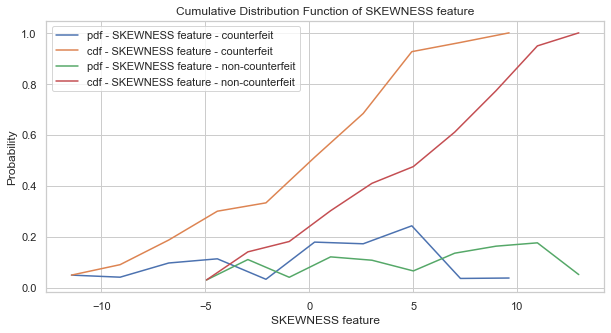

In [255]:
plt.figure(figsize=(10,5))

# counterfeit
counts, bin_edges = np.histogram(bank_note_counterfeit['skewness'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - SKEWNESS feature - counterfeit")
plt.plot(bin_edges[1:], cdf, label = "cdf - SKEWNESS feature - counterfeit")
plt.legend()

# non counterfeit
counts, bin_edges = np.histogram(bank_note_non_counterfeit['skewness'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - SKEWNESS feature - non-counterfeit")
plt.plot(bin_edges[1:], cdf , label = "cdf - SKEWNESS feature - non-counterfeit")
plt.title("Cumulative Distribution Function of SKEWNESS feature")
plt.xlabel("SKEWNESS feature")
plt.ylabel("Probability")
plt.legend()

In [256]:
# Statistics
print("statistics related to SKEWNESS feature - counterfeit category")
print(bank_note_counterfeit["skewness"].describe())

print("******************************************************************************************")
print("statistics related to SKEWNESS feature - non-counterfeit category")
print(bank_note_non_counterfeit["skewness"].describe())

statistics related to SKEWNESS feature - counterfeit category
count    610.000000
mean      -0.993576
std        5.404884
min      -13.773100
25%       -5.810025
50%        0.172775
75%        3.189275
max        9.601400
Name: skewness, dtype: float64
******************************************************************************************
statistics related to SKEWNESS feature - non-counterfeit category
count    762.000000
mean       4.256627
std        5.138792
min       -6.932100
25%        0.450063
50%        5.668800
75%        8.691975
max       12.951600
Name: skewness, dtype: float64


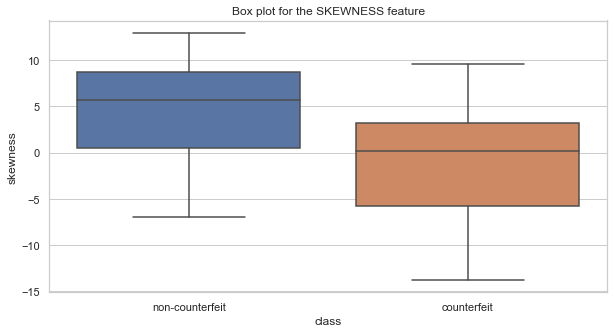

In [257]:
plt.figure(figsize=(10,5))
plt.title("Box plot for the SKEWNESS feature")
sns.boxplot(x='class',y='skewness', data=bank_note_data)
plt.show()

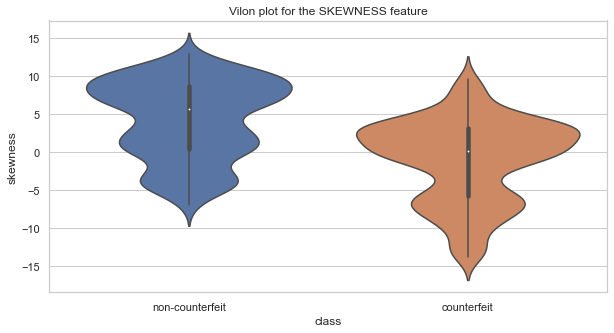

In [258]:
plt.figure(figsize=(10,5))
plt.title("Vilon plot for the SKEWNESS feature")
sns.violinplot(x="class", y="skewness", data = bank_note_data)
plt.show()

# Curtosis

Text(0.5, 1.0, 'Histogram of CURTOSIS feature')

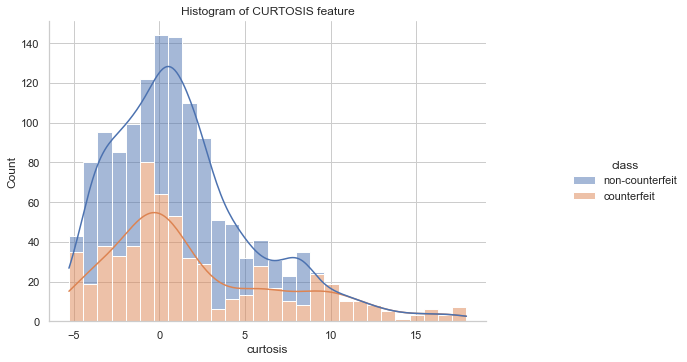

In [259]:
hist = sns.displot(data=bank_note_data, x="curtosis", hue="class", multiple="stack", kde=True)
hist.fig.set_size_inches(10,5)
plt.title("Histogram of CURTOSIS feature")

[0.13934426 0.17704918 0.29672131 0.08852459 0.08360656 0.05081967
 0.08852459 0.04098361 0.01147541 0.02295082]
[-5.2861  -2.96475 -0.6434   1.67795  3.9993   6.32065  8.642   10.96335
 13.2847  15.60605 17.9274 ]
[0.09317585 0.12073491 0.11811024 0.14829396 0.17454068 0.14566929
 0.08530184 0.03937008 0.02362205 0.0511811 ]
[-4.9417  -3.56459 -2.18748 -0.81037  0.56674  1.94385  3.32096  4.69807
  6.07518  7.45229  8.8294 ]


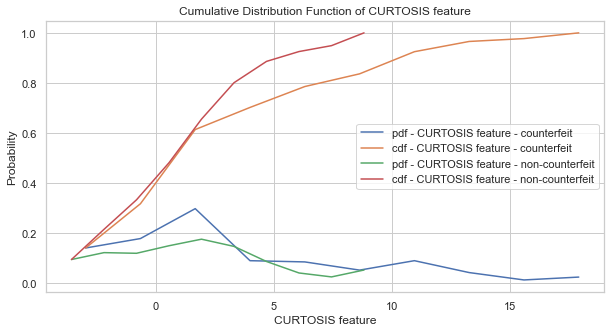

In [260]:
plt.figure(figsize=(10,5))

# counterfeit
counts, bin_edges = np.histogram(bank_note_counterfeit['curtosis'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - CURTOSIS feature - counterfeit")
plt.plot(bin_edges[1:], cdf, label = "cdf - CURTOSIS feature - counterfeit")
plt.legend()

# non counterfeit
counts, bin_edges = np.histogram(bank_note_non_counterfeit['curtosis'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - CURTOSIS feature - non-counterfeit")
plt.plot(bin_edges[1:], cdf , label = "cdf - CURTOSIS feature - non-counterfeit")
plt.title("Cumulative Distribution Function of CURTOSIS feature")
plt.xlabel("CURTOSIS feature")
plt.ylabel("Probability")
plt.legend()

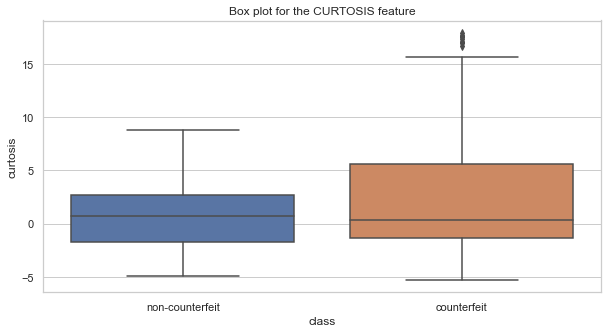

In [261]:
plt.figure(figsize=(10,5))
plt.title("Box plot for the CURTOSIS feature")
sns.boxplot(x='class',y='curtosis', data=bank_note_data)
plt.show()

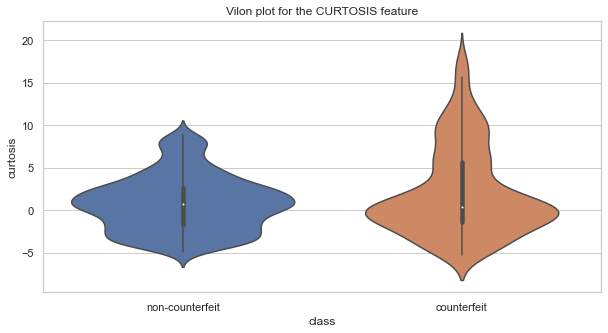

In [262]:
plt.figure(figsize=(10,5))
plt.title("Vilon plot for the CURTOSIS feature")
sns.violinplot(x="class", y="curtosis", data = bank_note_data)
plt.show()

# Entropy

Text(0.5, 1.0, 'Histogram of ENTROPY feature')

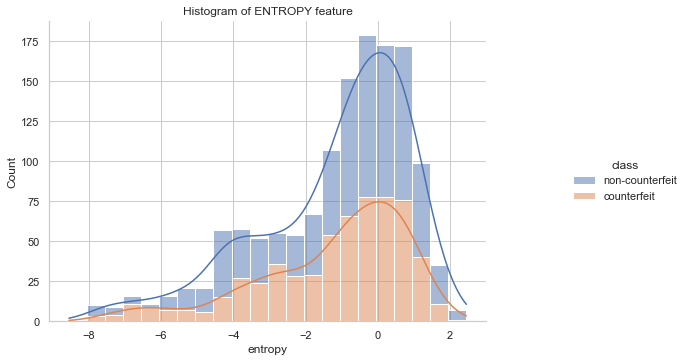

In [267]:
hist = sns.displot(data=bank_note_data, x="entropy", hue="class", multiple="stack", kde=True)
hist.fig.set_size_inches(10,5)
plt.title("Histogram of ENTROPY feature")

[0.02786885 0.02622951 0.02131148 0.06065574 0.08360656 0.09508197
 0.16229508 0.2442623  0.22459016 0.05409836]
[-7.5887 -6.6163 -5.6439 -4.6715 -3.6991 -2.7267 -1.7543 -0.7819  0.1905
  1.1629  2.1353]
[0.0144357  0.00918635 0.02493438 0.06955381 0.09055118 0.06430446
 0.16141732 0.26115486 0.25853018 0.04593176]
[-8.5482  -7.44843 -6.34866 -5.24889 -4.14912 -3.04935 -1.94958 -0.84981
  0.24996  1.34973  2.4495 ]


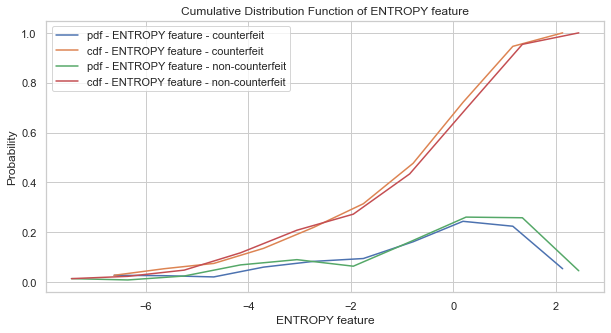

In [268]:
plt.figure(figsize=(10,5))

# counterfeit
counts, bin_edges = np.histogram(bank_note_counterfeit['entropy'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - ENTROPY feature - counterfeit")
plt.plot(bin_edges[1:], cdf, label = "cdf - ENTROPY feature - counterfeit")
plt.legend()

# non counterfeit
counts, bin_edges = np.histogram(bank_note_non_counterfeit['entropy'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf - ENTROPY feature - non-counterfeit")
plt.plot(bin_edges[1:], cdf , label = "cdf - ENTROPY feature - non-counterfeit")
plt.title("Cumulative Distribution Function of ENTROPY feature")
plt.xlabel("ENTROPY feature")
plt.ylabel("Probability")
plt.legend()

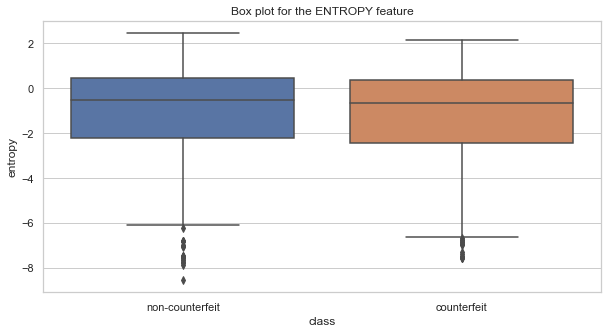

In [269]:
plt.figure(figsize=(10,5))
plt.title("Box plot for the ENTROPY feature")
sns.boxplot(x='class',y='entropy', data=bank_note_data)
plt.show()

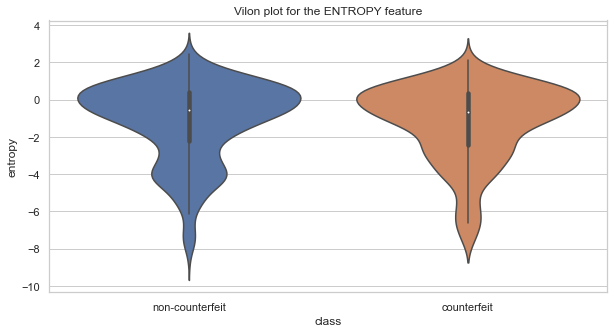

In [270]:
plt.figure(figsize=(10,5))
plt.title("Vilon plot for the ENTROPY feature")
sns.violinplot(x="class", y="entropy", data = bank_note_data)
plt.show()

# Bi variate analysis

# 2-D Scatter Plot - example

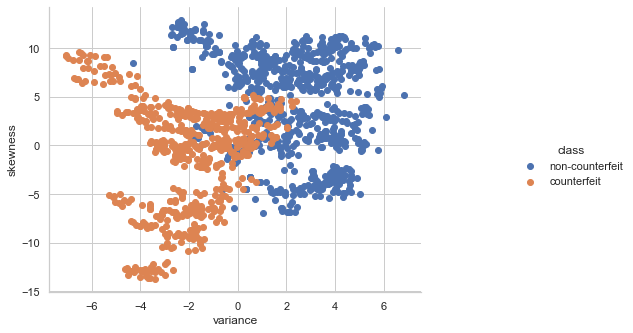

In [272]:
sns.set_style("whitegrid");
g = sns.FacetGrid(bank_note_data, hue="class", height=4) \
   .map(plt.scatter, "variance", "skewness") \
   .add_legend();
g.fig.set_size_inches(10,5)
plt.show();


# 3D Scatter plots

# Pair plots

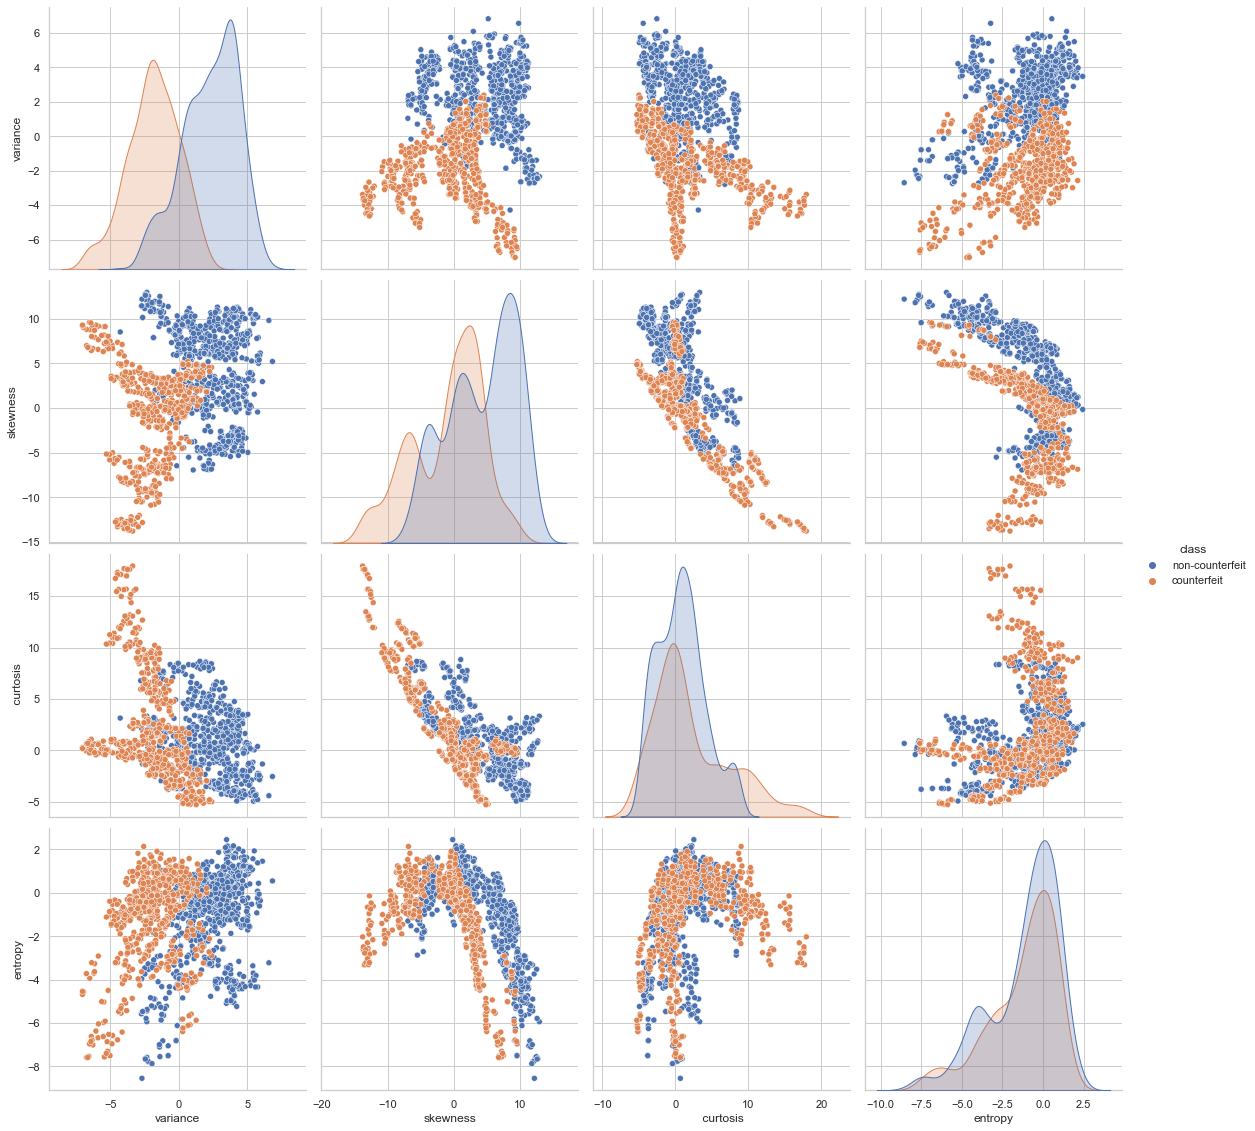

In [131]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(bank_note_data, hue="class", height=4);
plt.show()